## Capstone: Using Machine Learning to Score Powerlifting Meets

### The Problem: 
Powerlifting is a sport that has widely expanded in popularity over the past 10 years. The increase in interest has lead to an increase in the number of cash prizes available for lifters. With a higher stake, some have called into question the validity of the method for determining who is the "Best Lifter" across weight classes. 

**Intro to Powerlifting:** Powerlifting is a one rep-max sport. Lifters are given three attempts on three lifts-the squat, the bench press, and the deadlift. Three judges decide whether each attempt is good or failed. Your best attempt at each lift is added to your **total** which is then used to determine your rank/score. 

**Scoring Powerlifting:** Lifters are scored based on highest total within weight classes, **divisions** (separated by age group) and equipment level. For each division and equipment level there is also a "Best Lifter award across weight classes. Best Lifter is determined by highest **Wilks Score.** 

Aside: Powerlifting Equipment are shirts, suits and wraps that help to capture the **kinetic energy** associated with the lift. Imagine pulling back a rubber band, that force with which the rubber band springs back into place is the kinetic energy. Equipment applies that force to the lift, allowing the lifter to lift more weight. 
From here on, without equipment will be referred to as **Raw** and with equipment will be referred to as **Single-ply**

**What is the Wilks Score?:** Wilks score is a way of scoring across weight classes created by Robert Wilks in 1994. It measures **relative strength**, or what you lift relative to your size - instead of **absolute stregnth** or how much you lift overall. A coefficient calculated with bodyweight is multiplied by the total lifted (or in the case of one lift only events, just the best lift from that event.) the Wilks Coefficient looks like this:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/97274a51d2d3213a9ab7f8a98d91fd6eb0c23e81" />

Where "x" is the lifters bodyweight and coefficients a-f are values specific to each gender. (for more information check out the Wilks <a href="http://en.wikipedia.org/wiki/Wilks_Coefficient">Wikipedia</a> page. 

**What is Wrong with the Wilks Score?**

In his article, <a href="http://www.strongerbyscience.com/whos-the-most-impressive-powerlifter/">Who's The Most Impressive Powerlifter?</a>, Greg Nuckols outlines the problems with the Wilks score, they are as follows:
1. It’s biased against middleweights
2. It’s based off of mixed raw/equipped data (with no way to account  for it) 
3. It’s overcomplicated for a relationship just between bodyweight/weight lifted (one might say its overfit)
4. It hasn’t been updated since its creation (while new world records have been set) 
5. It's based off of totals. 

6. **Bonus: Not in the article** it only accounts for the relationship between bodyweight and weight lifted, while age and equipment also affect what a person will lift. 

## The Solution:

Create a model (using more data and more features) to predict the total a person will lift. The score will be the difference between the total the person actually lifted, and the predicted total. 

## Executive Summary

**Goal:** 

The goal of this project is to use machine learning principals to create a "fair" metric for scoring powerlifters across ages, genders, weight classes and level of equipment.

**The Data:**

Data was taken from the website <a href="www.openpowerlifting.org">OpenPowerlifting</a> website. OpenPowerlifting offers results from every federation. Data was selected for this project from the USAPL/IPF federations. These federations were chosen because of familiarity with rules, it was the same federations used by Wilks/Nuckols, and because these federations implement drug testing. Use of performance enhancing drugs is a factor that is going to affect lifter's ability which non-drug tested federations have no way to measure. Thus, it would throw off predictions in the model used. It was easier to select a federation in which it is assumed that no lifter is using the drugs. 

**Metrics:** 

Various metrics were used in assesing the scoring system. The first was to recreate the work done by Paul M. Vanderburgh and Alan M. Batterham in their paper *Validation of the Wilks powerlifting formula*, in which they looked at the correlation of bodyweight and Wilks adjusted scores to see if there were any trends. 

The next method used was to simulate 10,000 meets and to select a winner based on the machine learning model and also the wilks score. The distribution of these winners' bodyweight, age, and equipment were compared to the distribution of the lifters in the data (figuring that a fair metric would have winners that followed the distribution of the lifters) 

These distributions were analyzed with histograms, distplots, quantile-quantile plots, and using the Kolmogorov-Smirnov statistic. 

**Findings:** 

The residuals scores had a much lower correlation with bodyweight than did Wilks adjusted scores.

For men, the distributions of bodyweight of the winners was much more similar to the distribution of the lifters than was the distribution of wilks winners. The KS test reflected this as well. 

For women the distributions of residuals winners, wilks winners and the distribution of lifters were all much closer together, making it harder to discern which is more "fair." The wilks winners distribution scored better on th KS test but by a marginal amount. 

For both men and women, the distribution of Raw v. Single Ply lifters in the winners was closer to the distribution within the data for winners as scored by Residuals. 

**Limitations/Assumptions:**

Limitations:
1. Null values reduced the amount of usable data from 75,000 to 50,000. 
2. Unorganized entry scheme for values restricted the amount of information that the dataset could give. 
3. There is no clear way to measure the "fair"-ness of a scoring coefficient. The solution to this problem is not simply to get the highest score possible. Other's could find fault with the methods used.

Assumptions:
1. All weight values (for lifts and for bodyweight) were entered in kilograms.
2. Everyone in single-ply was using uniform equipment.
3. Every lifter has complied with the rules of USAPL/IPF and does not take performance enhancing drugs.
4. All data is entered correctly.

## Exploratory Data Analysis.

Data was collected from the OpenPowerlifting <a href="http://github.com/sstangl/openpowerlifting/">GitHub</a>. 
Data was sorted by federation and then by meet. In each meet folder was a csv titled "meet.csv" which had data specific to that meet. There was also a csv called "lifters.csv" which had data about every lifter in the meet. The first task was to concatenate the two csvs so that the meet data was in every lifter's row (most importantly this was to make sure that every lifter had a date associated with their lifts). The second task was to concatenate all the meets to make one big dataframe. That dataframe was then saved as a single csv so that it could be used in analysis and modeling. The code to this can be viewed <a href="http://git.generalassemb.ly/sophiazwilson/powerlifting-project/blob/master/Part%201-Get%20Data.ipynb">here</a> (Note that this was originally conducted on an AWS instance so the clone of the OpenPowerlifting data is not available)

Since the features of interest- BodyweightKg, Age, Sex, Equipment and weight lifted (TotalKg) were already known, a lot of the EDA was focused on cleaning and imputation. 

The first nulls to drop were lifters who had no data for any of the lifts or a total. 
- Reasoning: Since the modeling was focused how much a person lifted, rows with no data about this would give no information. Sometimes it happens that someone is registered for a meet and they don't show up, this is most likely what's going on in these rows, but they don't need to be in the data set.

The next nulls to deal with were the null values in the BodyweightKg column. Fortunately there is a column called WeightClassKg, which has what weight class the lifter competed in. In most cases these weight classes are an upper limit. In that, the person did not weigh even a kg more than that weight class. (Rules state that if someone weighs 64 kg they do not qualify for the 63kg weight class- and they must compete in the 72kg weight class) 
So if BodyweightKg is null but WeightClassKg is not, that weight class is a very close estimate of what the person weighs. This added about 5,000 values to the BodyweightKg column. 

Rows where both BodyweightKg and WeightClassKg were null were dropped.
- Reasoning: Bodyweight is the basis for all scoring metrics when it comes to weight lifting events. Bodyweight has been proven again and again to have an effect on how much a person can lift. Without Bodyweight, or any way of estimating that information, there is nothing to be done. 

Rows were BodyweightKg were null and WeightClassKg had a "+" were also dropped.
- Reasoning: Values in the WeightClassKg with a "+" in them mean "everyone above this weight competes in this class." Using the weight class as the BodyweightKg in these cases is not as close of a guess as it is with the other weight classes. 

The next nulls to attempt to fill in were the nulls in the Age column. The dataframe originally only had 3,762 values for age, but a lot of them could be imputed. The first way to impute them was to extract the year from the date of the meet and subtract that from the value in the BirthYear column. This brought the values in the Age column up to 28,090 values. 

The next step was to try and get age information from the divisions column. Since most divisions (other than open) are open to a range of ages (a range that's never bigger than 10). This was done by taking the average age in each division and then turning it into a dictionary, from which to enter age. Some keys were still null. So the values for the keys that were null, but had an age range were entered into the dictionary by hand. 

The next step was to look at the "Best" Lifts columns and the TotalKg columns. 

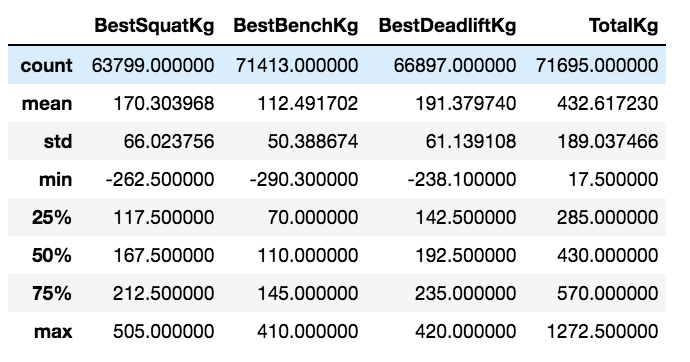

TotalKg is way too low (it's almost impossible that a lifter would only lift 17.5 kg across all three lifts) and there are values for the "Best" lifts columns that are negative (which is theoretically not possible). 
the TotalKg that was 17.5 Kg was a 10 year old girl who competed in "Bench only".  TotalKg should only refer to people who lifted in all three of the lifts (or there would be no way to tell).
Also, a negative value in the "Best" lifts column refers to a failed attempt, if all three attempts are failed then the best lift would be negative. When this happens in a meet it means the lifter has "bombed out" (been disqualified). if the lifter didn't lift the weight, then it should not count in the analysis of how much someone can lift.  Two functions were used to change TotalKg to null if the lifter did not compete in all three lifts, and also to turn the "Best" lift to null if the lifter did not make any of their attempts. 


**Early Statistical Analysis** 
The next part was to see how Age and Equipment affects amount lifted, this was done through graphs and T-Tests. 

For Age, data was divided by quartiles. I found the middle two quartiles were between ages 19 and 41, so the data was divided into 19 and under, between 19 and 41, and 41 and over:

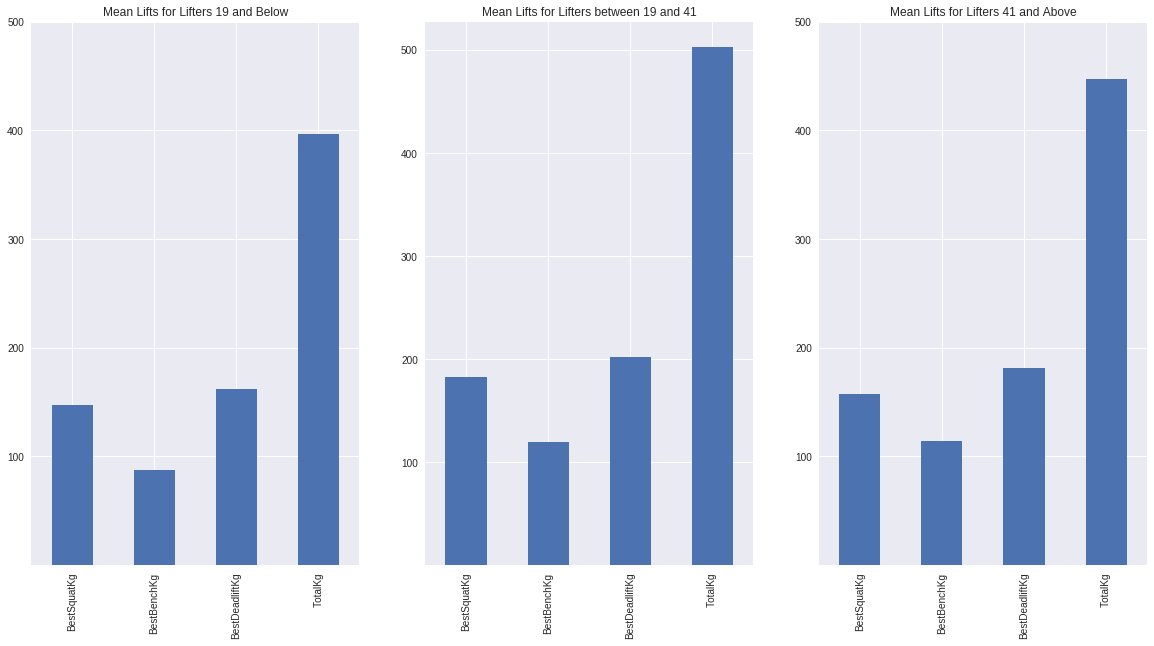

From the graphs it looks like middle two quartiles have the highest means. 

The results from the T-test on the 19 & below and the mid range were
 
Total: `Ttest_indResult(statistic=54.208268396808982, pvalue=0.0)`

Bench: `Ttest_indResult(statistic=58.777379235336753, pvalue=0.0)`

Squat: `Ttest_indResult(statistic=46.568281671986085, pvalue=0.0)`

Deadlift: `Ttest_indResult(statistic=59.566825412761787, pvalue=0.0)`

and the T-tests for the mid range and the 41 and above were:

Total: ` Ttest_indResult(statistic=26.373598668733358, pvalue=1.142544308296164e-151)`

Bench: `Ttest_indResult(statistic=9.4907561900215214, pvalue=2.4240918749470581e-21)`

Squat: `Ttest_indResult(statistic=30.948205185102587, pvalue=2.4331779968987561e-207)`

Deadlift: `Ttest_indResult(statistic=29.844472677296874, pvalue=2.8813804977469239e-193)`


For Equipment, I compared the Means for Raw to the means for Single-ply:

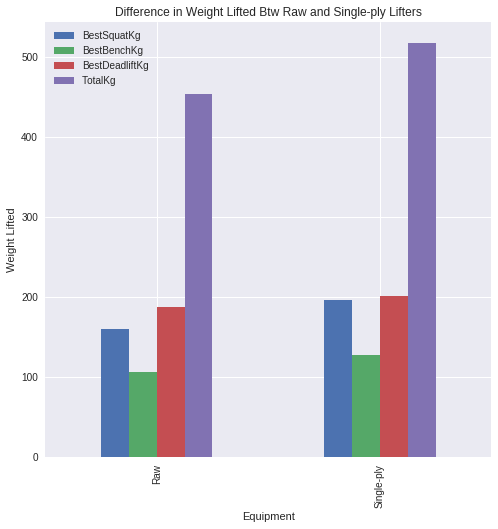

It seemed to make a big difference in Bench and in Total, but not so much for Squat or deadlift.

The results from the T-tests were:

Total: `Ttest_indResult(statistic=-43.622651862019893, pvalue=0.0)`

Bench: `Ttest_indResult(statistic=-52.619276061722516, pvalue=0.0)`

Squat: `Ttest_indResult(statistic=-64.542410876216749, pvalue=0.0)`

Deadlift: `Ttest_indResult(statistic=-25.314975741497467, pvalue=1.009175629933086e-140)`

So both Age and Equipment have some effect on what a lifter will lift


The next task was inspired by the validation work 
<a href="http://europepmc.org/abstract/med/10613442"> done by Paul M. Vanderburgh and  Alan M. Batterham.</a> In this paper, they graphed bodyweight by weight lifted, and then compared it to body weight by wilks-adjusted weight lifted for each of the three lifts. 
However there were two clear differences in approach. First, they only used one year's worth of the best elite lifters from each weight class, totalling about 27-30 data points each for men and women. I chose to use all data available. While it makes sense to use the best lifters (because they are theoretically the current limits of what each human can lift), with powerlifting's growing popularity it makes sense to see how the wilks coefficient works for everyone. Second, they did not look at correlations, they looked at the relationship on the graphs. They did this because they suspected a "curvilinear" relationship. With 27 thousand data points for men and 14 thousand data points for women, it was hard to discern a relationship, curvilinear or not, so looking at correlations served as a good indicator of a trend in data. 

I compared the correlations of every lifter in the data but also the correlations of only raw lifters between the middle two quartiles for age. I did this because younger and older lifters tend to lift less, and Single-ply lifters tend to lift more, and I was originally planning not to account for these differences in my scoring metric. I also originally did a comparison for all three lifts as well as total- but only total is shown here since I decided to focus on total for my analysis. Graphs are regplots so as to better identify trend lines. 

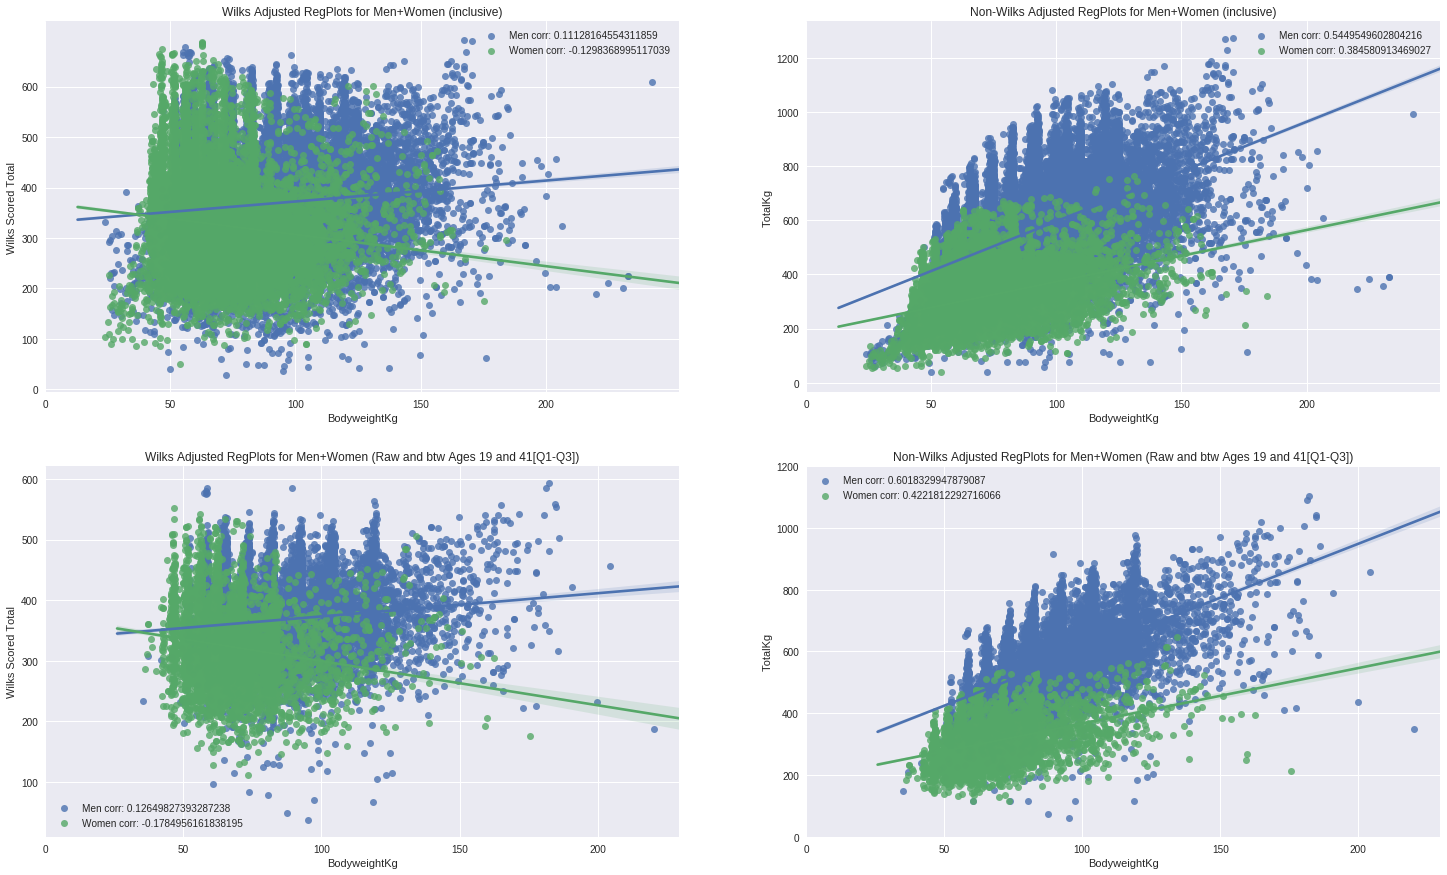


The wilks adjusted correlation for all men is 0.111, and the wilks adjusted correlation for all women is -0.13. 

The non adjusted correlation for all men is 0.545, and the non adjusted correlation for all women is 0.385. 

The wilks adjusted correlation for raw men between is 0.126, and the wilks adjusted correlation for raw women between is -0.18. 

The non adjusted correlation for raw men between is 0.602, and the non adjusted correlation for raw women between is 0.422. 

The Wilks score de-correlates the data significantly. However it slightly trends toward heavier men and trends away from heavier women. The correlations are stronger for the raw lifters between 19 and 41 for both men and women, wilks-adjusted and non-adjusted. This makes sense because both Age and Equipment seem to have an effect on the weight lifted. When lifters are isolated based on these features, the correlation gets tighter.  

# Modeling

My strategy was to model off the data to predict how much weight a lifter will lift. Lifters are then scored based on how much they actually lifted compared to what they were expected to lift: 

This method would account for the fact that heavier lifters tend to lift more than lighter lifters. It would predict less weight lifted for a lighter lifter, thus measure relative strength. (Lifters will be judged based not on how much they lift, but how much they lift relative to what they were predicted to lift.) 
Using a model also allows predictions to be made not just based on bodyweight, but also on age, sex and whether the lifter uses equipment or not. The wilks coefficient only accounts for bodyweight and sex (in that there are separate coefficients for men and for women)

I decided to focus on TotalKg and not the other lifts. This is because the majority of the lifters in the data were participating in **full power** meets, meaning they were doing all three lifts. It is less common (but not rare) to see someone compete in only one or two of the lifts. In the future, given more time, I plan to create a model for each of the three lifts individually. 

I selected an ElasticNet model.
- Reasoning: I wanted predictions that could be easily calculated (so that they could be calculated by hand during a meet) 
- I did play around with some non-parametric models, like a Random Forest, which scored better. However that model would most likely need to be calculated by a computer. Besides, since this model is for measuring purposes and not predictions that affect business decisions, the model's score is less important than it's distribution of residuals. 
- Also I wanted some regularization to avoid overfitting. Since new powerlifters are getting started all the time, it is important that the predictive model generalizes well. 

For my first model: 

My features were `Age`, `Sex`, `Equipment`, and `BodyweightKg`

My target was `TotalKg` 

My r^2 score was `0.625` 

I decided fit another model but to create a feature called `Bodyweight_twothirds` because <a href="https://en.wikipedia.org/wiki/Allometry">allometric scaling</a>, which has scientific confirmation, states that the relationship between mass and strength is not linear. Rather the relationship between the two is closer to mass to the two thirds power.  

On this model: 

My features were `Age`, `Sex`, `Equipment`, and `BodyweightKg_twothirds`

My target was `TotalKg` 

My r^2 score was `0.628` 

I decided `Bodyweight_twothirds` more closely measured the relationship because it scored slightly better and also, if we look at the predictions for both models. Where predictions & residuals refert to the first model, and predictionsb & residualsb refer to the second (allometric) model

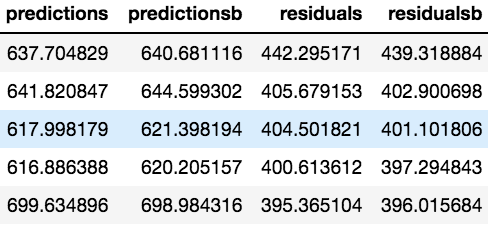

on the highest residuals, the allometric model predicted more, leading to residuals that were slightly closer.

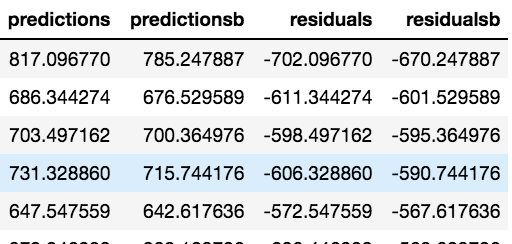

On the lowest residuals, the allometric model predicted less, leading to residuals that were slightly closer. Thus the allometric bodyweight seems to better approximate the relationship between bodyweight and weight lifted.  

However, I noticed that on both ends, the lifters with the highest residuals and the lifters with the lowest residuals were both all men. It seemed like women were being eclipsed by men. It seemed like there wass something non-linear about men and women's relative strength, that can't be measured by simply turning on/off a value.I decided to split up men and women and create a model for each (instead of adding an interaction term for gender with every other feature). 
- Reasoning: every added feature is added complexity to the formula we are predicting. Although I don't anticipate this formula being adopted any time soon, I still intend to build something that is easy to understand/implement. 
- Wilks score has separate coefficient values for men and women, I decided I didn't need to completely break the wheel. 

I did however add a feature called `allo_BW/E`, which is an interaction term for `BodyweightKg_twothirds` and `Equipment` (`BodyweightKg_twothirds * Equipment`)
- Reasoning: I figured if bodyweight was so relevant to how much a person lifted, it probably would affect how much a person would lift with equipment. (Maybe heavier people get a bigger relative bump in total from equipment) 

I also added a term called `is_SHW`, which is a binary feature. The value of the feature is 1 if the lifter is a man over 120 kg or a woman over 84 kg (based on the weight classes)
- Reasoning: SHW's or **superheavyweights** seemed to have the highest predictions, and the highest negative residuals. It is possible that the relationship between mass and weight lifted is different when lifters get that big. 

Additionally, I added a polynomial feature for `Age` (`Age**2`)
- Reasoning: When you look at a graph of Age by weight lifted, it looks more parabolic than it does linear. 

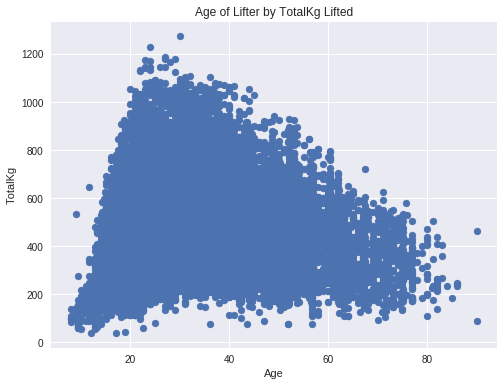

**For men:** 

My features were `Age`, `Age_squared`, `Equipment`, `BodyweightKg_twothirds`, `is_SHW`, and `allo_BW/E`

My target was `TotalKg` 

My r^2 score was `0.512` 

**For women:** 

My features were `Age`, `Age_squared`, `Equipment`, `BodyweightKg_twothirds`, `is_SHW`, and `allo_BW/E`

My target was `TotalKg` 

My r^2 score was `0.412` 

While these scores are lower than the score of the unisex model, they are not lower by much. This means the models kept a lot of their predictive power. The original was not predicting very well based on Sex, so it is better to have two separate models. 

## Validation

### Validation of Residuals

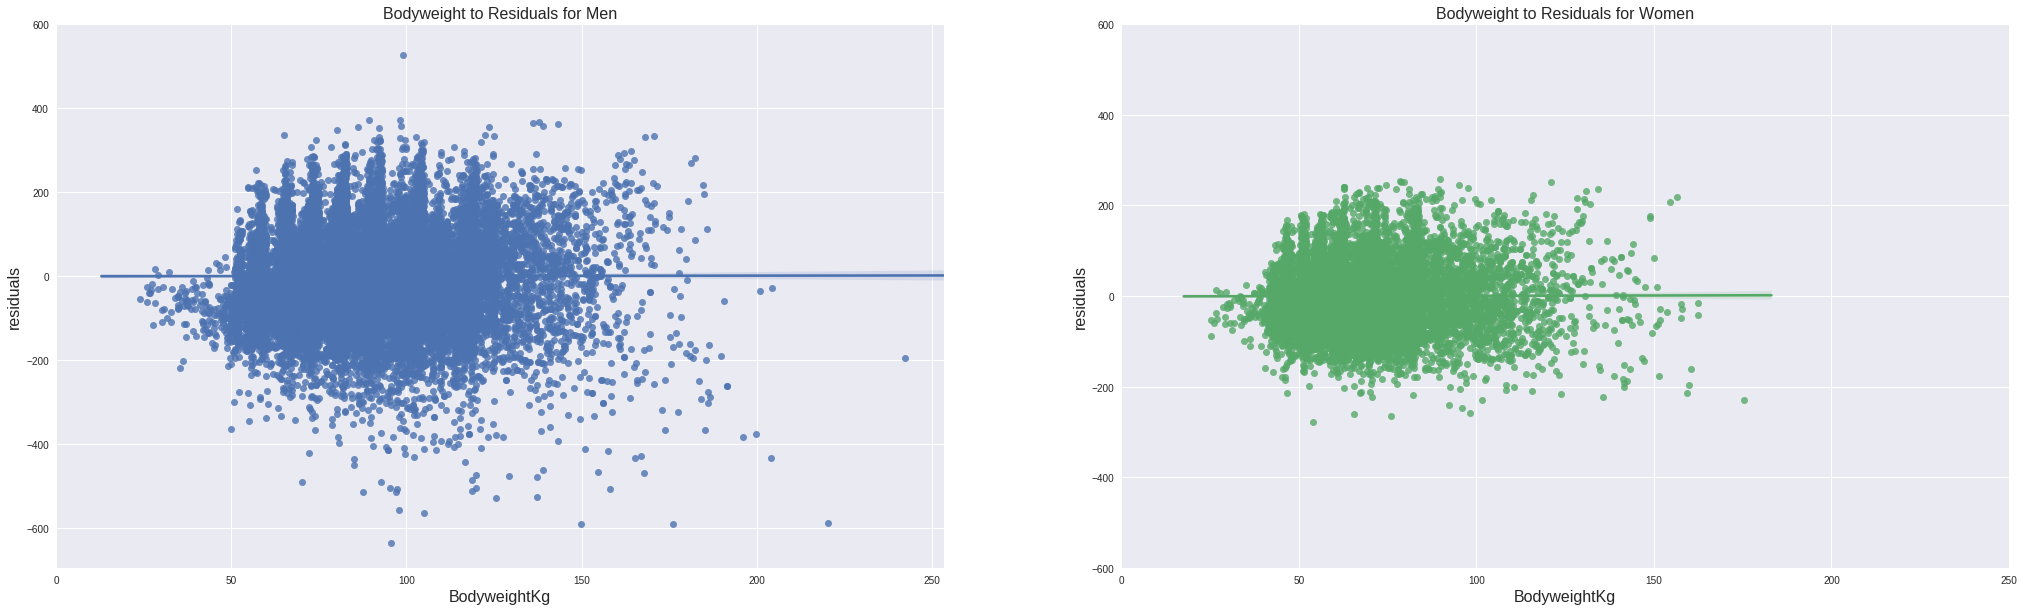

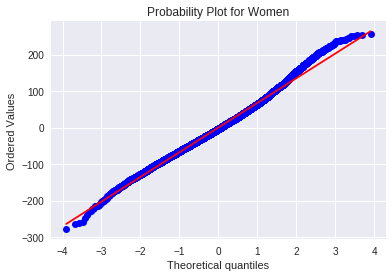

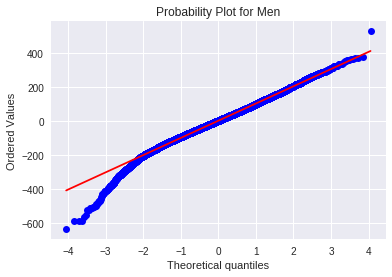

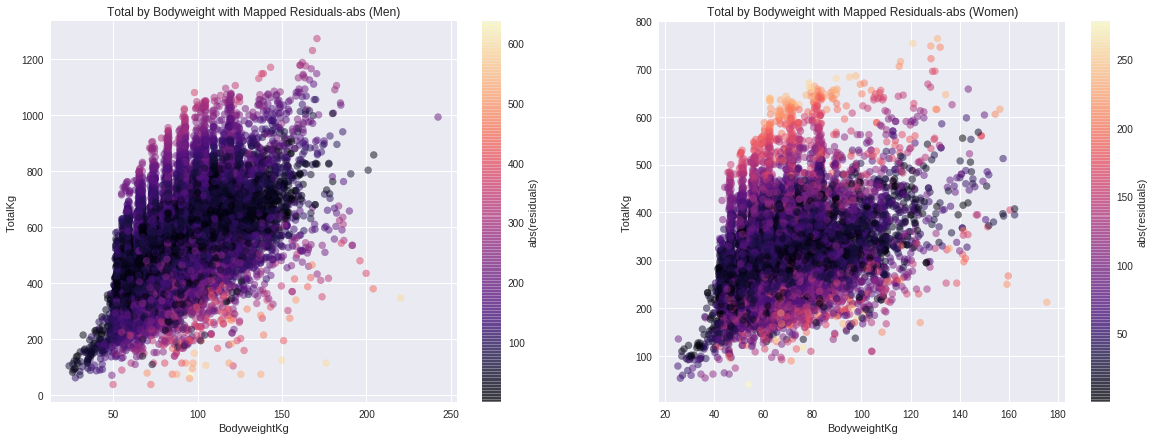

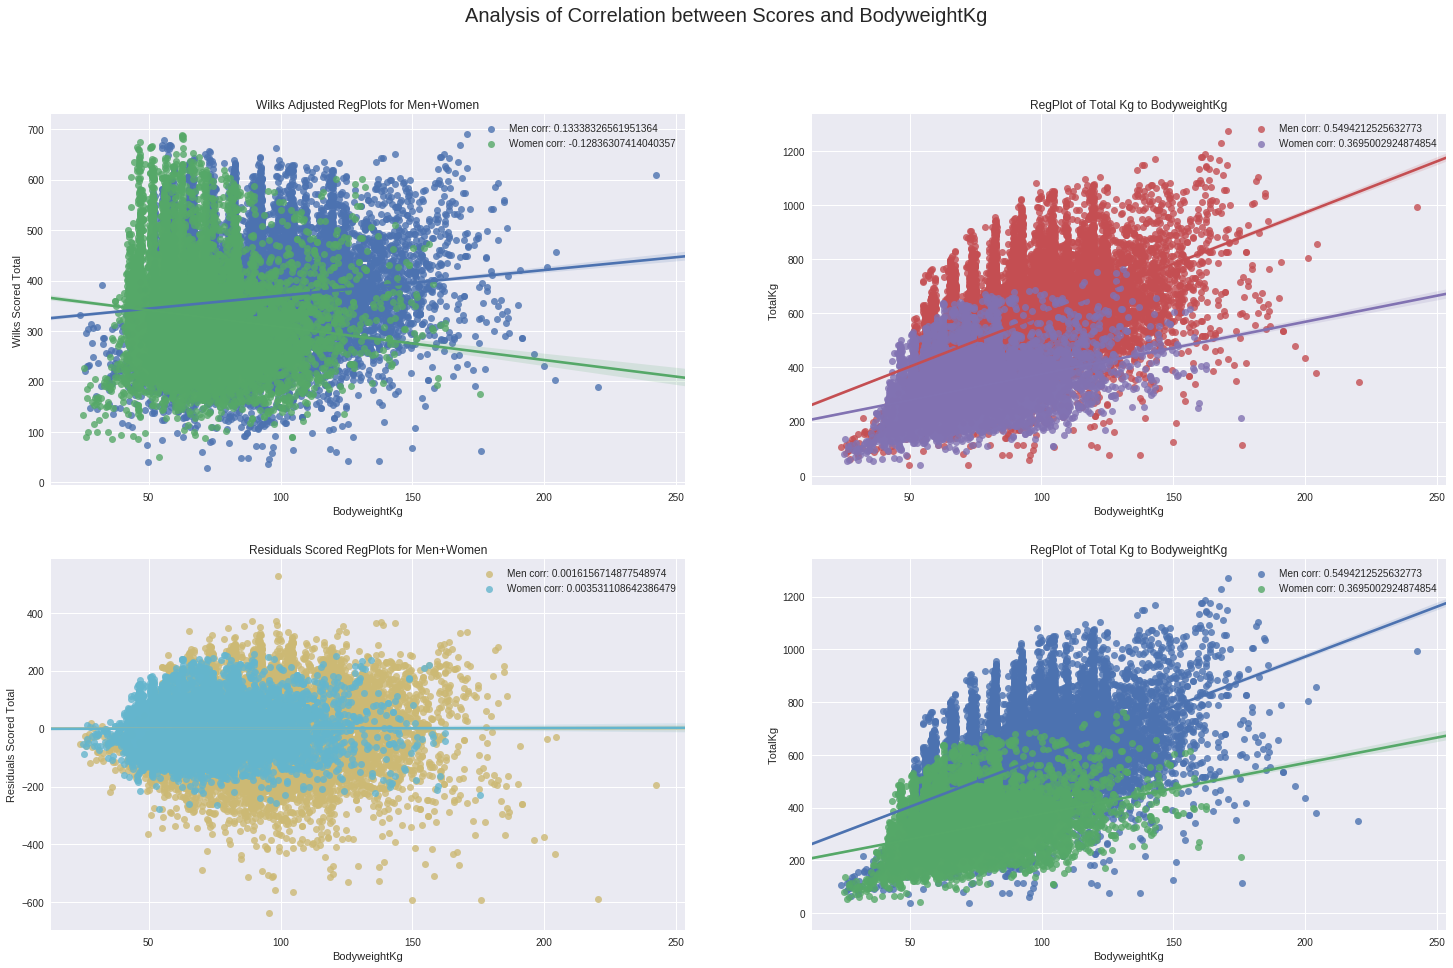

### Validation through Simulated Meets

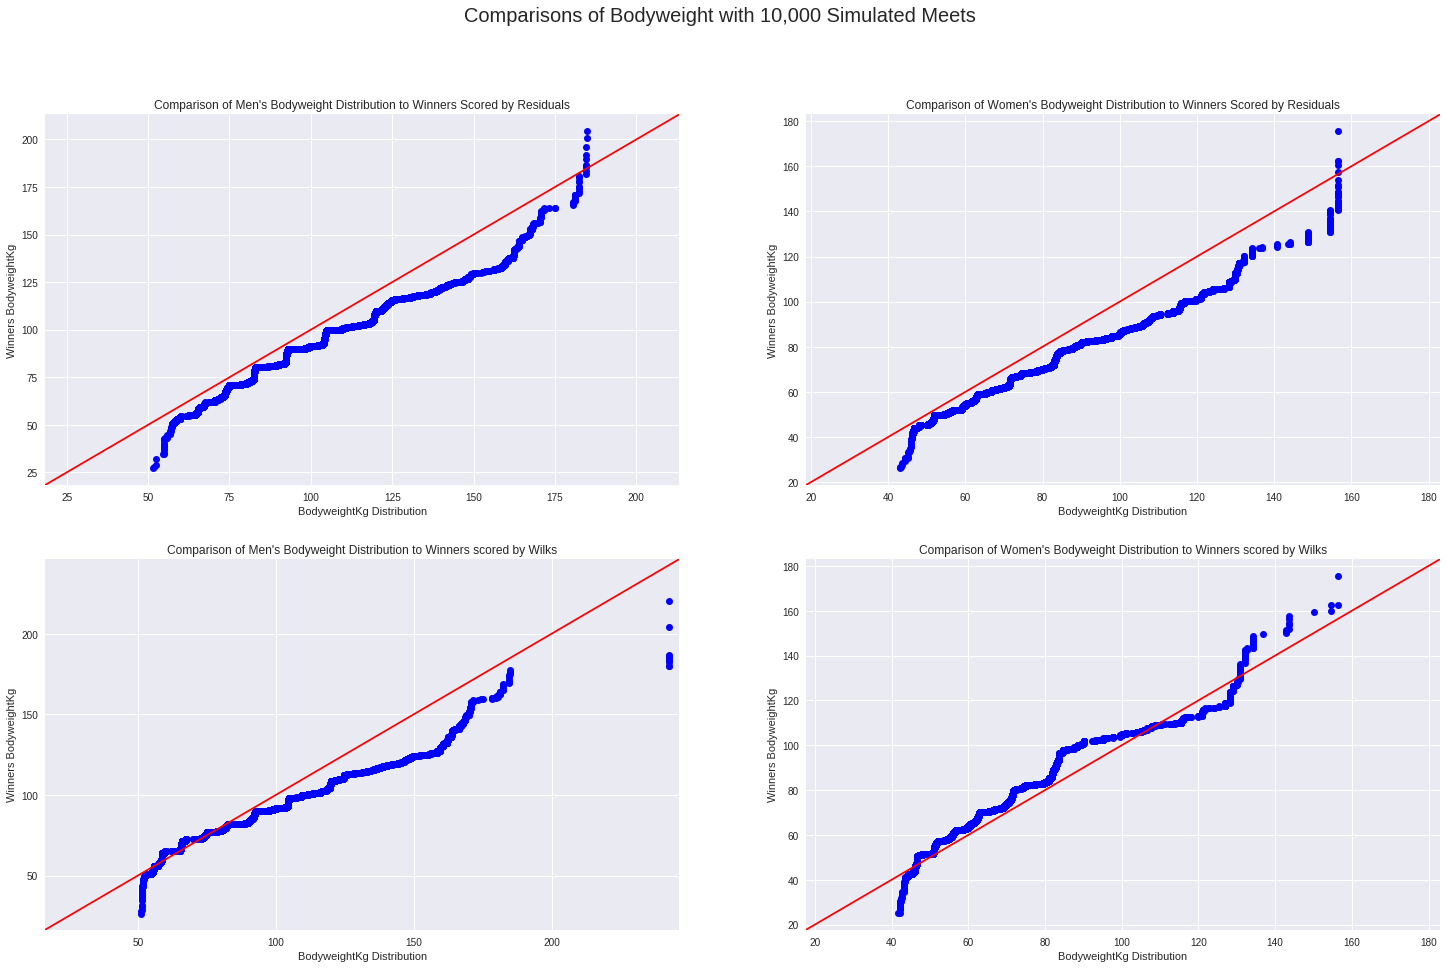

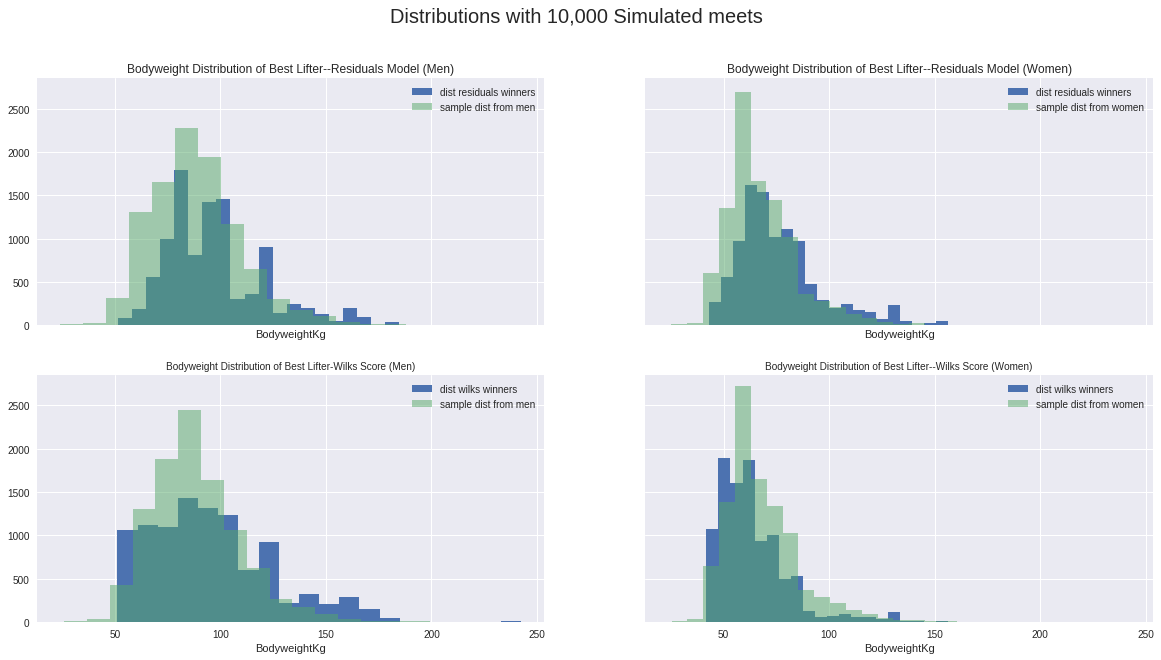

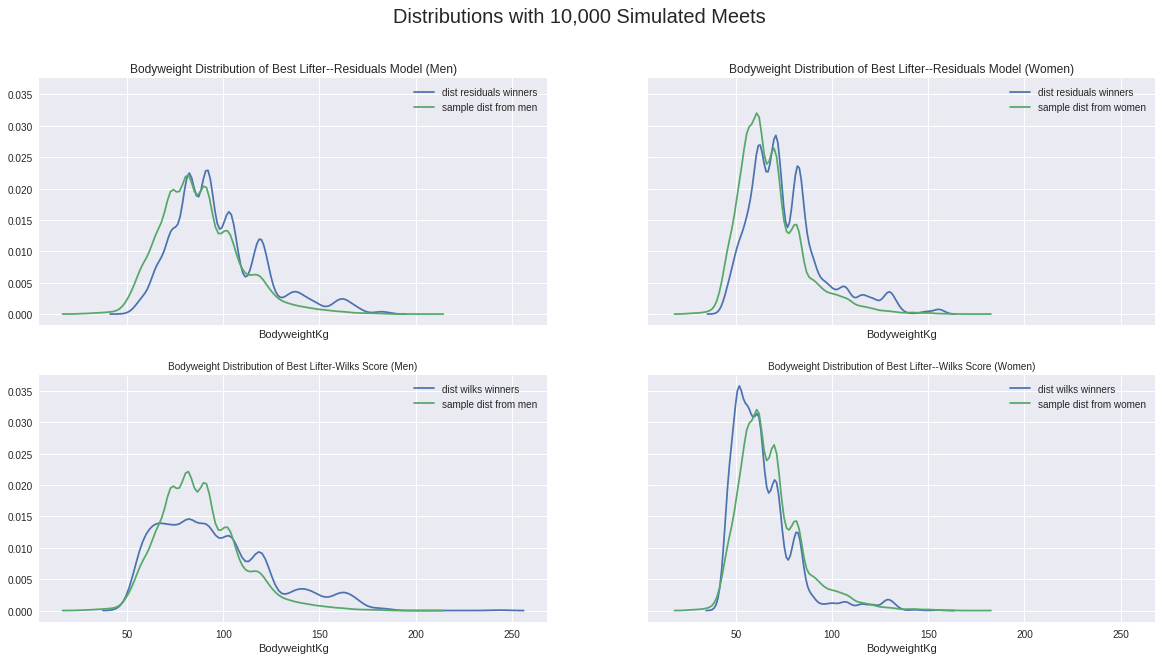